In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset 
df = pd.read_csv('terrorist-attacks.csv')


In [2]:
# List of columns that represent attack methods
attack_method_columns = [
    'Attack method: Hijacking',
    'Attack method: Hostage Taking (Barricade Incident)',
    'Attack method: Unarmed Assault',
    'Attack method: Facility/Infrastructure Attack',
    'Attack method: Hostage Taking (Kidnapping)',
    'Attack method: Assassination',
    'Attack method: Armed Assault',
    'Attack method: Bombing/Explosion'
]

# Create a new column 'Dominant Attack Method'
df['Dominant Attack Method'] = df[attack_method_columns].idxmax(axis=1)

# Check the first few rows to ensure it worked
df[['Dominant Attack Method'] + attack_method_columns].head()

,Dominant Attack Method,Attack method: Hijacking,Attack method: Hostage Taking (Barricade Incident),Attack method: Unarmed Assault,Attack method: Facility/Infrastructure Attack,Attack method: Hostage Taking (Kidnapping),Attack method: Assassination,Attack method: Armed Assault,Attack method: Bombing/Explosion
0,Attack method: Hijacking,0,0,0,0,0,0,0,0
1,Attack method: Hijacking,0,0,0,0,0,0,0,0
2,Attack method: Hijacking,0,0,0,0,0,0,0,0
3,Attack method: Hijacking,0,0,0,0,0,0,0,0
4,Attack method: Hijacking,0,0,0,0,0,0,0,0


In [3]:
# Encode the 'Entity' column using OneHotEncoder
df = pd.get_dummies(df, columns=['Entity'], drop_first=True)

# Encode the target variable 'Dominant Attack Method' using LabelEncoder
label_encoder = LabelEncoder()
df['Dominant Attack Method'] = label_encoder.fit_transform(df['Dominant Attack Method'])

# Check the dataset after encoding
df.head()

,Code,Year,Terrorist attacks,Terrorism deaths,Attack method: Hijacking,Attack method: Hostage Taking (Barricade Incident),Attack method: Unarmed Assault,Attack method: Facility/Infrastructure Attack,Attack method: Hostage Taking (Kidnapping),Attack method: Assassination,...,Entity_West Germany,Entity_Western Europe,Entity_Western Sahara,Entity_World,Entity_Yemen,Entity_Yemen Arab Republic,Entity_Yugoslavia,Entity_Zaire,Entity_Zambia,Entity_Zimbabwe
0,AFG,1970,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,AFG,1971,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,AFG,1972,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,AFG,1973,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,AFG,1974,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Features (all columns except 'Dominant Attack Method')
X = df.drop(['Dominant Attack Method', 'Code'], axis=1)  # Drop 'Code' as it has many missing values and might not add value

# Target variable
y = df['Dominant Attack Method']

In [5]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape

((8413, 239), (2104, 239))

In [6]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [7]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9525

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       180
           1       0.97      0.83      0.89       111
           2       0.89      0.99      0.93       500
           3       0.93      0.84      0.88        98
           4       1.00      1.00      1.00      1140
           5       1.00      0.30      0.46        10
           6       0.91      0.75      0.82        52
           7       0.79      0.85      0.81        13

    accuracy                           0.95      2104
   macro avg       0.92      0.80      0.83      2104
weighted avg       0.95      0.95      0.95      2104



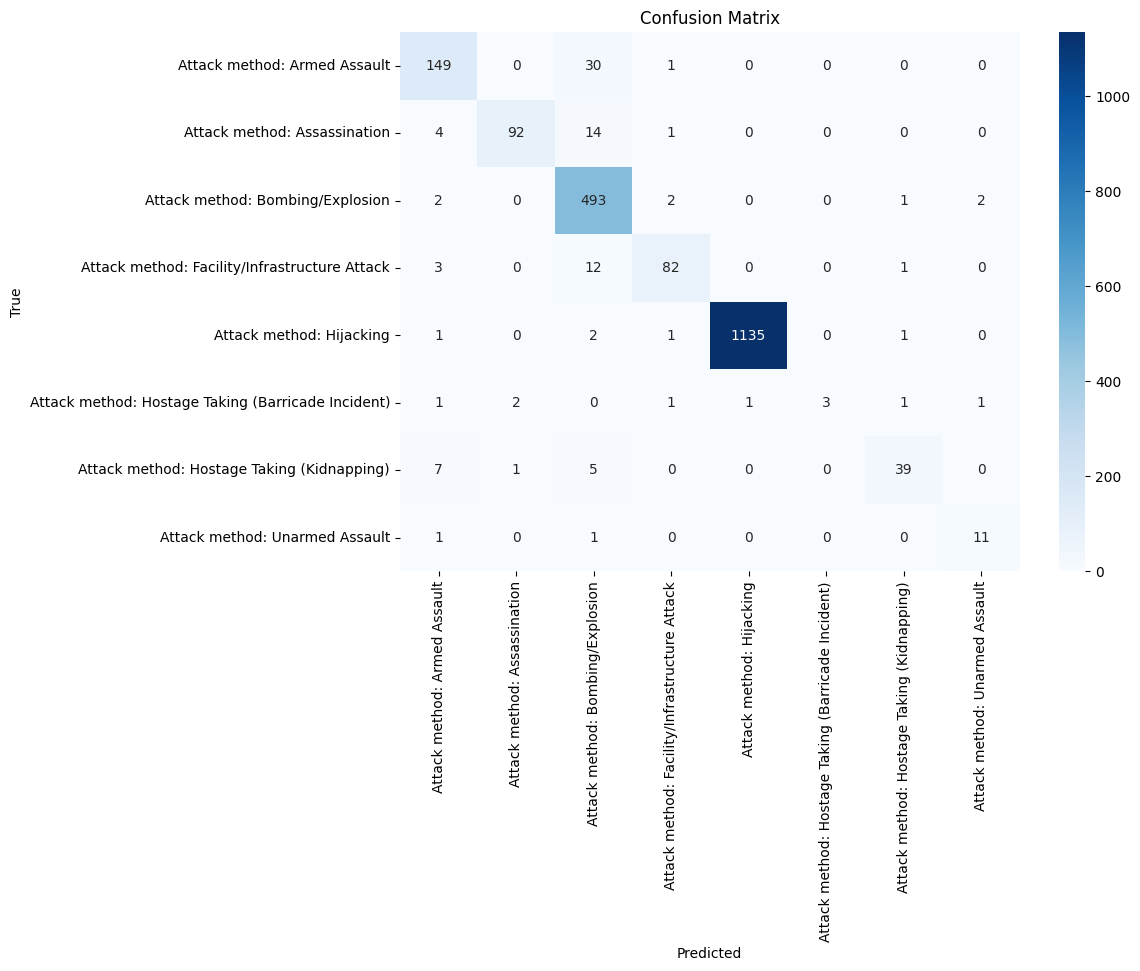

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Random Forest Accuracy: 0.9567

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       180
           1       0.99      0.83      0.90       111
           2       0.89      0.98      0.94       500
           3       0.93      0.84      0.88        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.89      0.79      0.84        52
           7       0.86      0.92      0.89        13

    accuracy                           0.96      2104
   macro avg       0.92      0.86      0.89      2104
weighted avg       0.96      0.96      0.96      2104



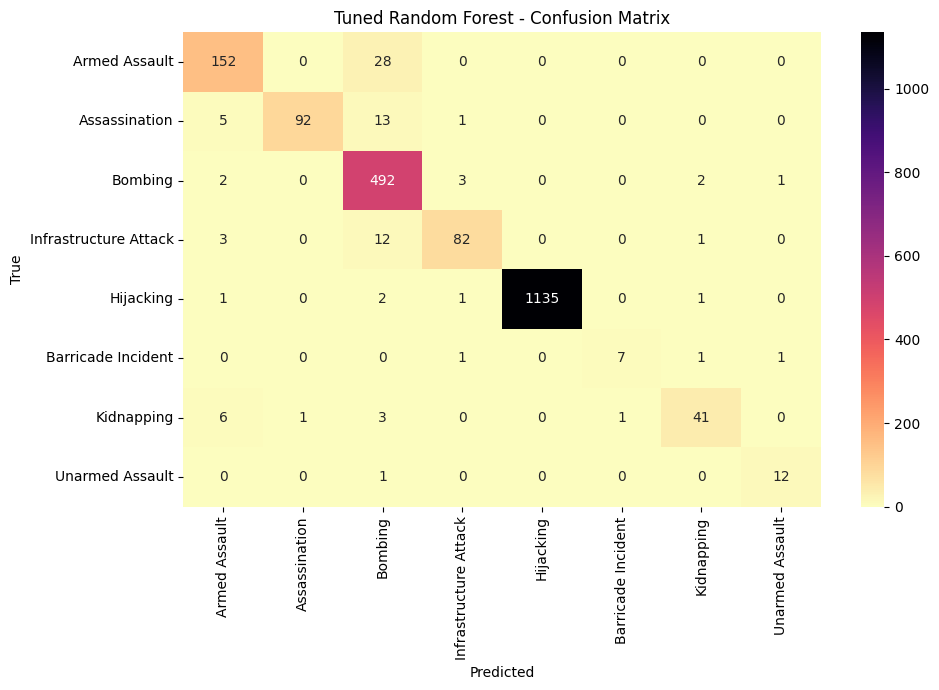

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters:\n{grid_search.best_params_}")

# Predict using best model
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTuned Random Forest Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Clean class labels (remove "Attack method: ")
clean_labels = [
    label.replace("Attack method: ", "")
         .replace("Bombing/Explosion", "Bombing")
         .replace("Facility/Infrastructure Attack", "Infrastructure Attack")
         .replace("Hostage Taking (Barricade Incident)", "Barricade Incident")
         .replace("Hostage Taking (Kidnapping)", "Kidnapping")
    for label in label_encoder.classes_
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma_r",
            xticklabels=clean_labels,
            yticklabels=clean_labels)
plt.title('Tuned Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.9648

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       180
           1       0.91      0.91      0.91       111
           2       0.97      0.97      0.97       500
           3       0.90      0.88      0.89        98
           4       1.00      1.00      1.00      1140
           5       0.89      0.80      0.84        10
           6       0.81      0.75      0.78        52
           7       0.73      0.85      0.79        13

    accuracy                           0.96      2104
   macro avg       0.89      0.88      0.88      2104
weighted avg       0.96      0.96      0.96      2104



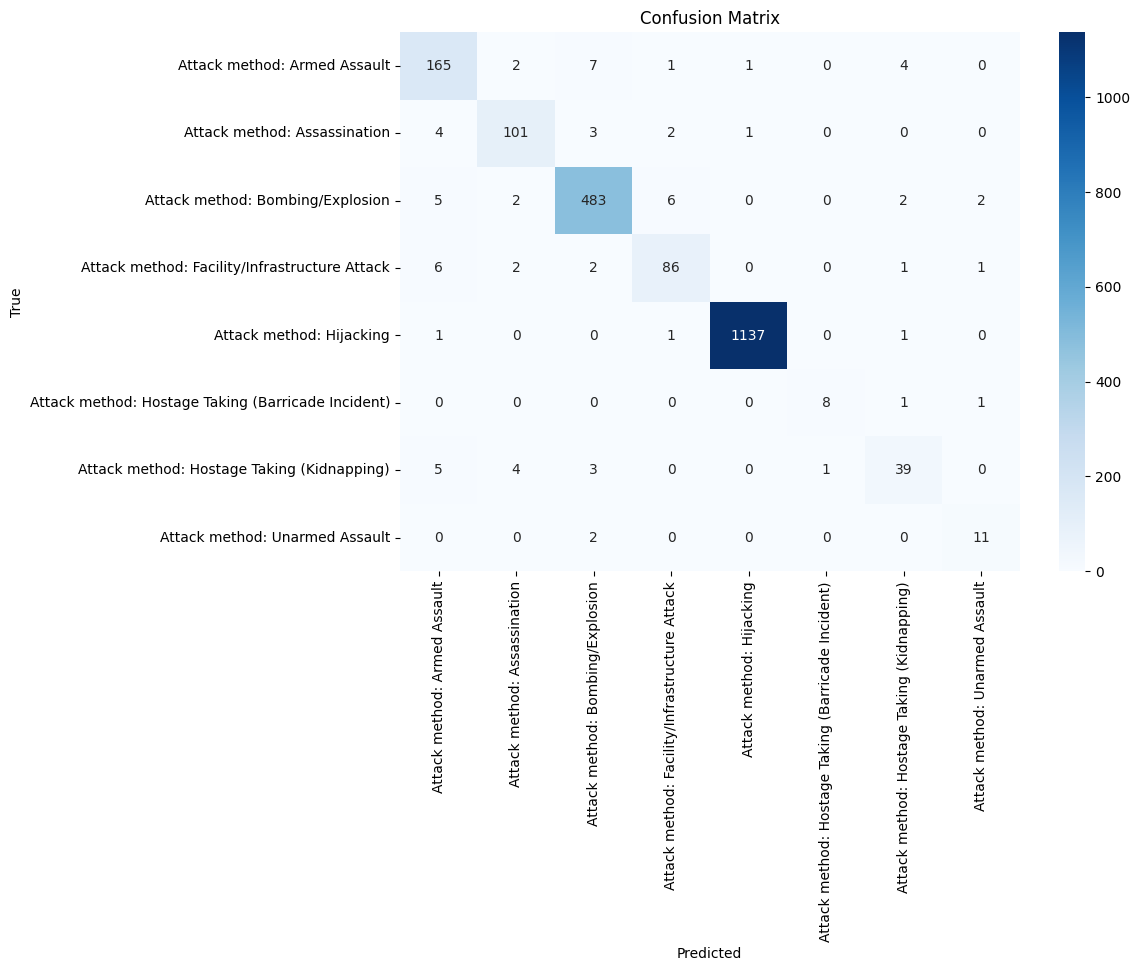

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Best parameters found: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9580

Decision Tree Test Accuracy: 0.9644

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       180
           1       0.90      0.91      0.91       111
           2       0.96      0.96      0.96       500
           3       0.91      0.89      0.90        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.86      0.83      0.84        52
           7       0.80      0.92      0.86        13

    accuracy                           0.96      2104
   macro avg       0.90      0.89      0.89      2104
weighted avg       0.96      0.96      0.96      2104



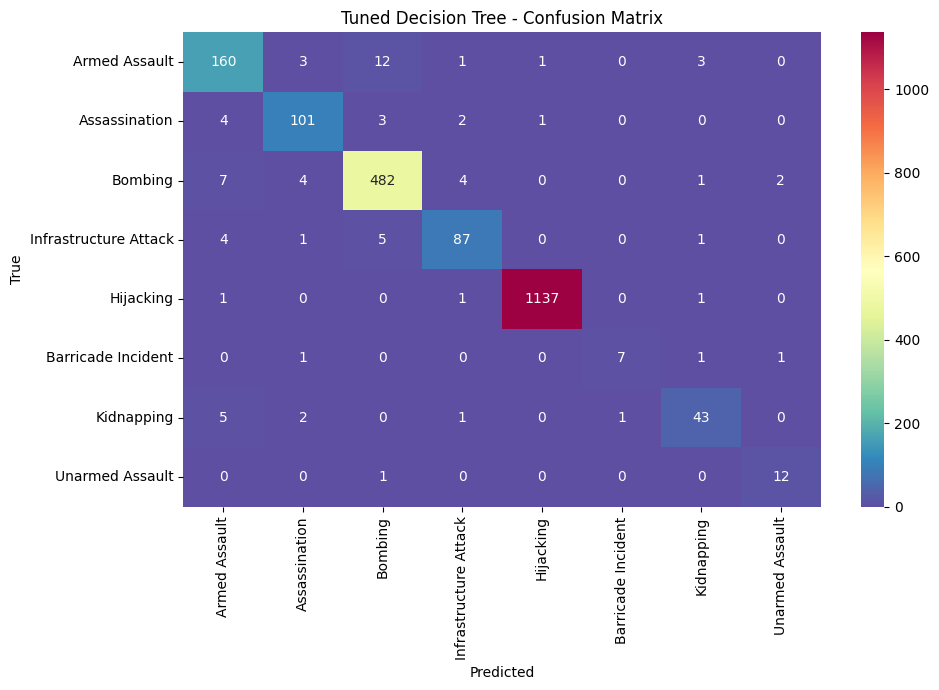

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Predict on the test set using the best model
y_pred = best_dt.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Test Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Clean class labels (remove "Attack method: ")
clean_labels = [
    label.replace("Attack method: ", "")
         .replace("Bombing/Explosion", "Bombing")
         .replace("Facility/Infrastructure Attack", "Infrastructure Attack")
         .replace("Hostage Taking (Barricade Incident)", "Barricade Incident")
         .replace("Hostage Taking (Kidnapping)", "Kidnapping")
    for label in label_encoder.classes_
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix with cleaned labels
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Spectral_r", 
            xticklabels=clean_labels, 
            yticklabels=clean_labels)
plt.title('Tuned Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Extra Trees Classifier Accuracy: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       180
           1       0.96      0.79      0.87       111
           2       0.87      0.97      0.92       500
           3       0.88      0.81      0.84        98
           4       1.00      0.99      1.00      1140
           5       0.89      0.80      0.84        10
           6       0.83      0.73      0.78        52
           7       0.92      0.92      0.92        13

    accuracy                           0.94      2104
   macro avg       0.90      0.85      0.87      2104
weighted avg       0.94      0.94      0.94      2104



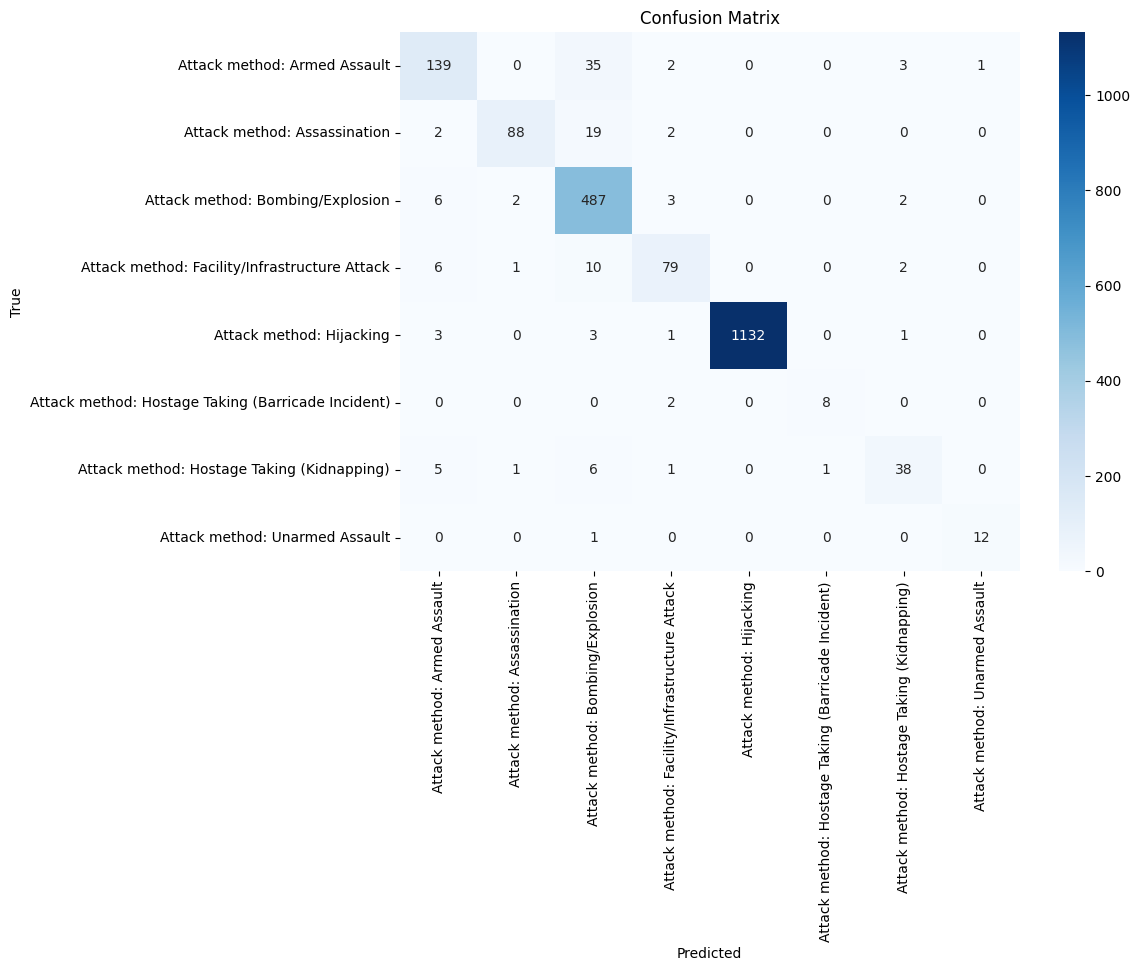

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees_classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Classifier Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Extra Trees Classifier Accuracy: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       180
           1       0.96      0.79      0.87       111
           2       0.87      0.97      0.92       500
           3       0.88      0.81      0.84        98
           4       1.00      0.99      1.00      1140
           5       0.89      0.80      0.84        10
           6       0.83      0.73      0.78        52
           7       0.92      0.92      0.92        13

    accuracy                           0.94      2104
   macro avg       0.90      0.85      0.87      2104
weighted avg       0.94      0.94      0.94      2104



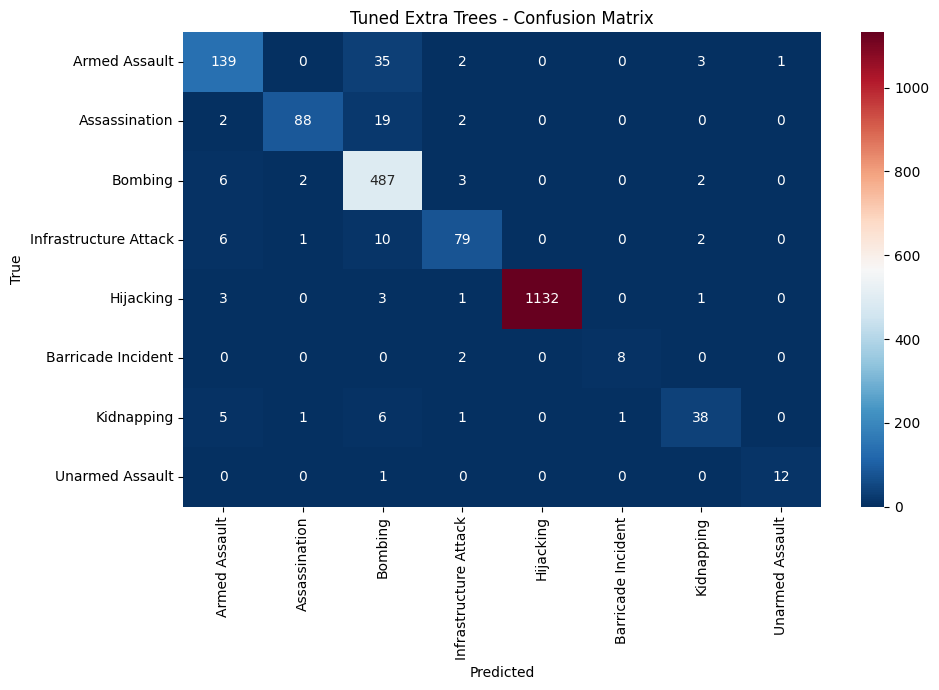

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Classifier Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Clean class labels by removing "Attack method: " prefix
clean_labels = [
    label.replace("Attack method: ", "")
         .replace("Bombing/Explosion", "Bombing")
         .replace("Facility/Infrastructure Attack", "Infrastructure Attack")
         .replace("Hostage Taking (Barricade Incident)", "Barricade Incident")
         .replace("Hostage Taking (Kidnapping)", "Kidnapping")
    for label in label_encoder.classes_
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix with clean labels
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=clean_labels,
            yticklabels=clean_labels)
plt.title('Tuned Extra Trees - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Stacking Classifier Accuracy: 0.9686

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       180
           1       0.96      0.91      0.94       111
           2       0.96      0.97      0.96       500
           3       0.91      0.93      0.92        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.84      0.81      0.82        52
           7       0.75      0.92      0.83        13

    accuracy                           0.97      2104
   macro avg       0.90      0.89      0.89      2104
weighted avg       0.97      0.97      0.97      2104



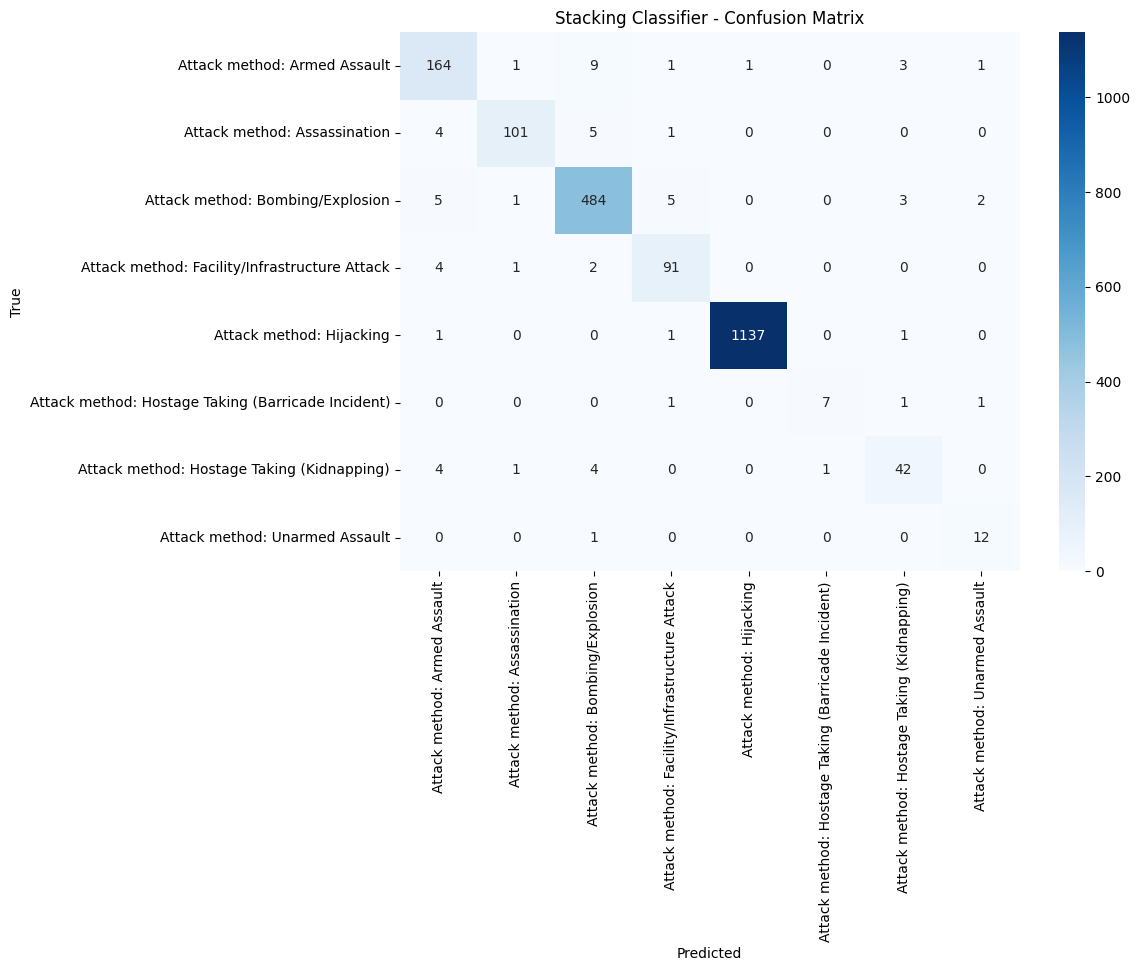

In [15]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Final estimator (meta-model)
final_estimator = LogisticRegression()

# Stacking classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Stacking Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fitting 3 folds for each of 96 candidates, totalling 288 fits

Best Parameters:
{'dt__max_depth': None, 'et__max_depth': None, 'et__n_estimators': 50, 'final_estimator__C': 1.0, 'rf__max_depth': None, 'rf__n_estimators': 100}

Stacking Classifier (Tuned) Accuracy: 0.9696

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       180
           1       0.95      0.92      0.94       111
           2       0.96      0.97      0.96       500
           3       0.91      0.93      0.92        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.84      0.83      0.83        52
           7       0.80      0.92      0.86        13

    accuracy                           0.97      2104
   macro avg       0.91      0.90      0.90      2104
weighted avg       0.97      0.97      0.97      2104



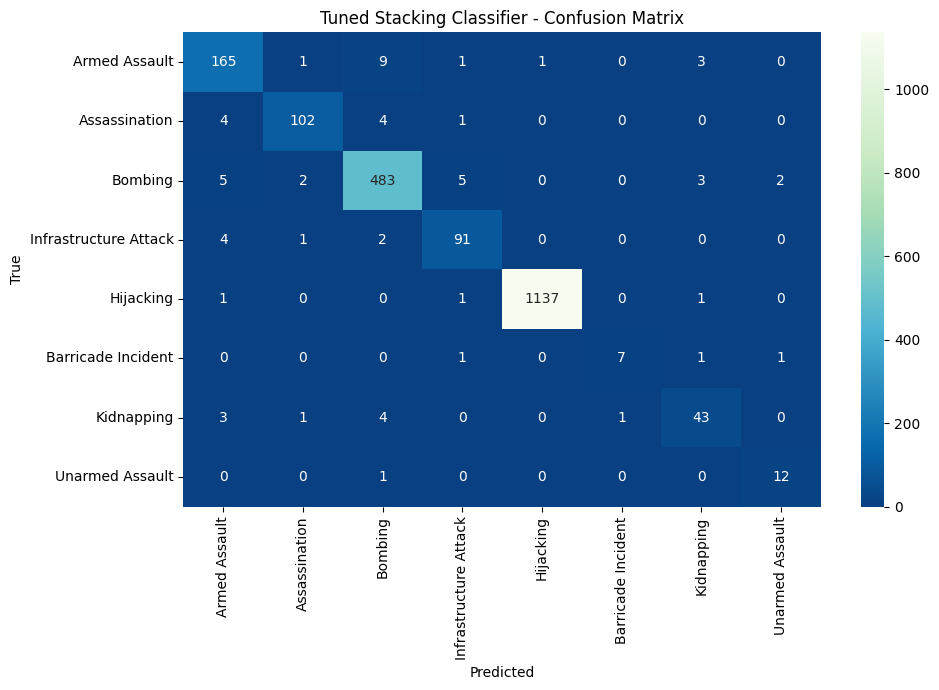

In [16]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define base models
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

# Final estimator
final_estimator = LogisticRegression(max_iter=1000)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('et', et)],
    final_estimator=final_estimator,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# Hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
    'dt__max_depth': [None, 10],
    'et__n_estimators': [50, 100],
    'et__max_depth': [None, 10],
    'final_estimator__C': [0.1, 1.0, 10.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=stack_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"\nBest Parameters:\n{grid_search.best_params_}")

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nStacking Classifier (Tuned) Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Clean class labels
clean_labels = [
    label.replace("Attack method: ", "")
         .replace("Bombing/Explosion", "Bombing")
         .replace("Facility/Infrastructure Attack", "Infrastructure Attack")
         .replace("Hostage Taking (Barricade Incident)", "Barricade Incident")
         .replace("Hostage Taking (Kidnapping)", "Kidnapping")
    for label in label_encoder.classes_
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu_r",
            xticklabels=clean_labels,
            yticklabels=clean_labels)
plt.title('Tuned Stacking Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Voting Ensemble Accuracy: 0.9587

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       180
           1       0.98      0.83      0.90       111
           2       0.90      0.99      0.94       500
           3       0.93      0.86      0.89        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.89      0.79      0.84        52
           7       0.80      0.92      0.86        13

    accuracy                           0.96      2104
   macro avg       0.91      0.87      0.88      2104
weighted avg       0.96      0.96      0.96      2104



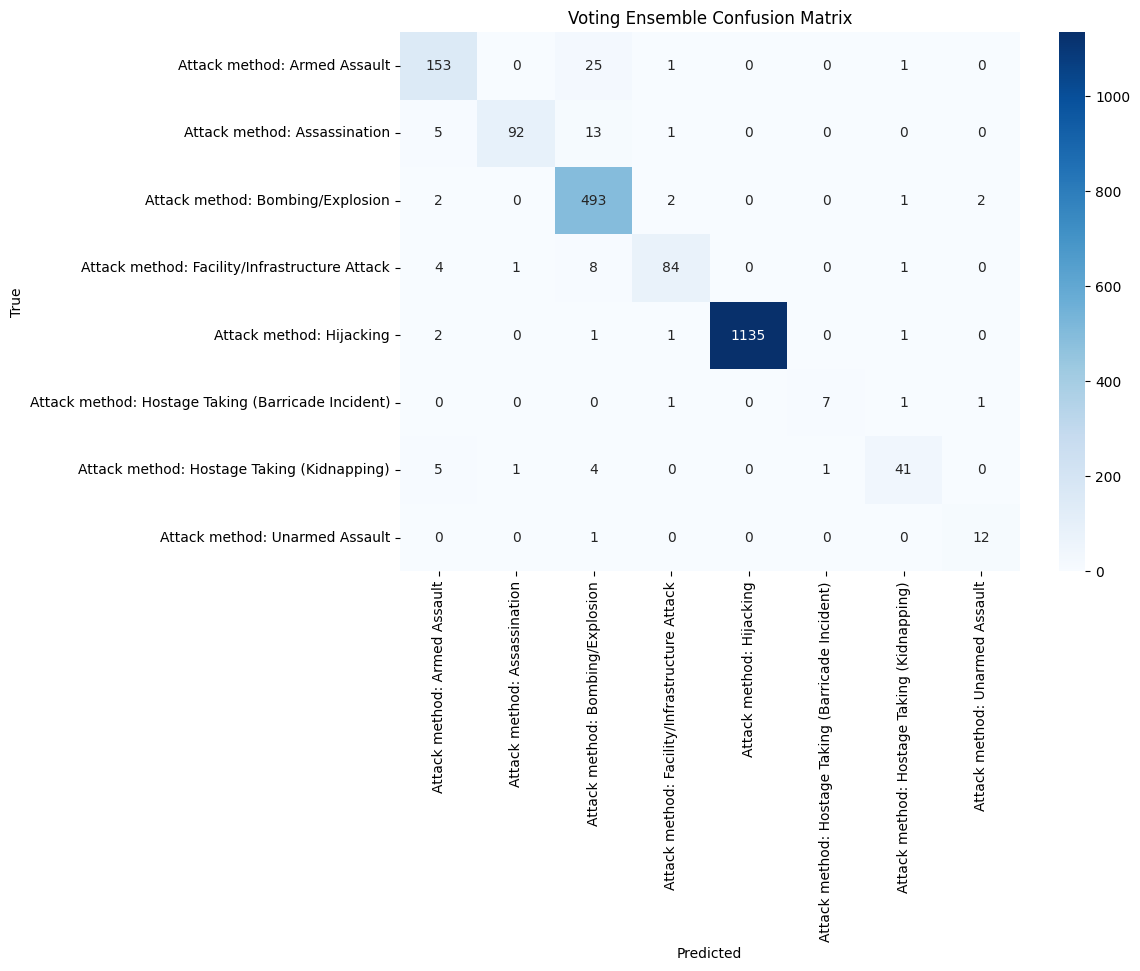

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Create the Voting Classifier (hard voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('dt', dt_classifier),
        ('et', extra_trees_classifier)
    ],
    voting='hard'  # you can use 'soft' if you want to average predicted probabilities
)

# Train ensemble model
voting_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = voting_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Ensemble Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Voting Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best Parameters:
{'dt__max_depth': None, 'et__max_depth': None, 'et__n_estimators': 100, 'rf__max_depth': None, 'rf__n_estimators': 50}

Voting Classifier (Tuned) Accuracy: 0.9582

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       180
           1       0.98      0.82      0.89       111
           2       0.90      0.99      0.94       500
           3       0.93      0.88      0.91        98
           4       1.00      1.00      1.00      1140
           5       0.88      0.70      0.78        10
           6       0.89      0.79      0.84        52
           7       0.80      0.92      0.86        13

    accuracy                           0.96      2104
   macro avg       0.91      0.87      0.88      2104
weighted avg       0.96      0.96      0.96      2104



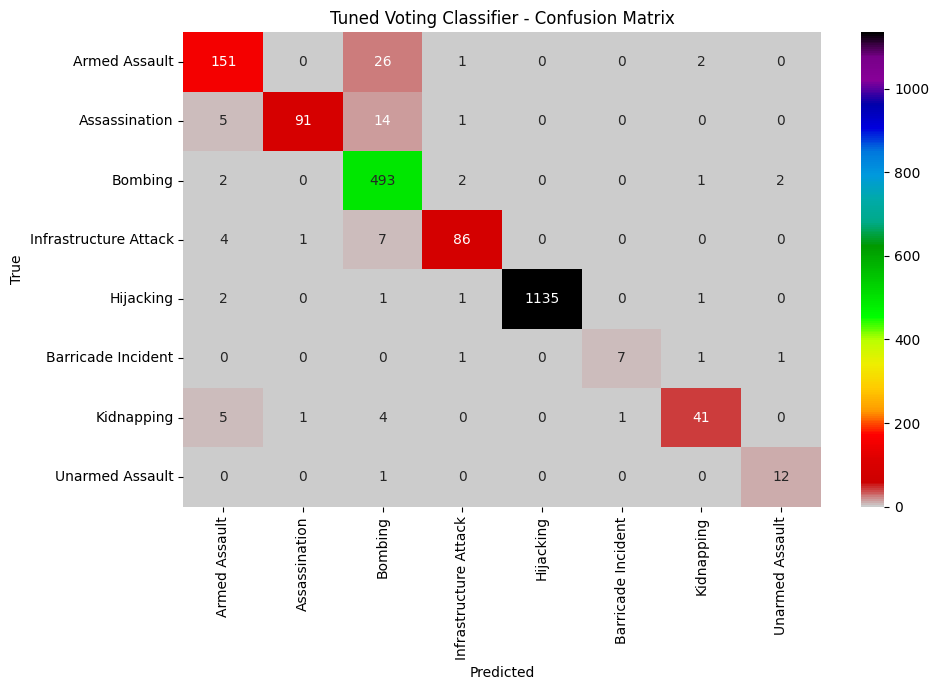

In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define base classifiers
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

# Voting Classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('dt', dt),
        ('et', et)
    ],
    voting='hard',
    n_jobs=-1
)

# Hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
    'dt__max_depth': [None, 10],
    'et__n_estimators': [50, 100],
    'et__max_depth': [None, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_voting_model = grid_search.best_estimator_
print(f"\nBest Parameters:\n{grid_search.best_params_}")

# Predict on test set
y_pred = best_voting_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nVoting Classifier (Tuned) Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Clean class labels
clean_labels = [
    label.replace("Attack method: ", "")
         .replace("Bombing/Explosion", "Bombing")
         .replace("Facility/Infrastructure Attack", "Infrastructure Attack")
         .replace("Hostage Taking (Barricade Incident)", "Barricade Incident")
         .replace("Hostage Taking (Kidnapping)", "Kidnapping")
    for label in label_encoder.classes_
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="nipy_spectral_r",
            xticklabels=clean_labels,
            yticklabels=clean_labels)
plt.title('Tuned Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


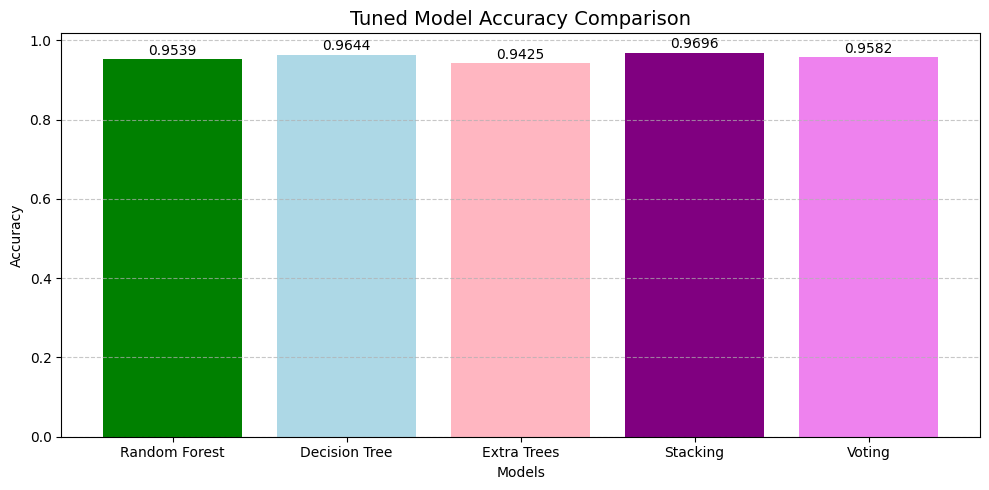

In [19]:
import matplotlib.pyplot as plt

# Filtered data for tuned models only
models = ['Random Forest', 'Decision Tree', 'Extra Trees', 'Stacking', 'Voting']
accuracies = [0.9539, 0.9644, 0.9425, 0.9696, 0.9582]
colors = ['Green', 'lightblue', 'lightpink', 'purple', 'violet']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=colors)

plt.title('Tuned Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.003,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Lindy\AppData\Local\Temp\ipykernel_18396\837312490.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


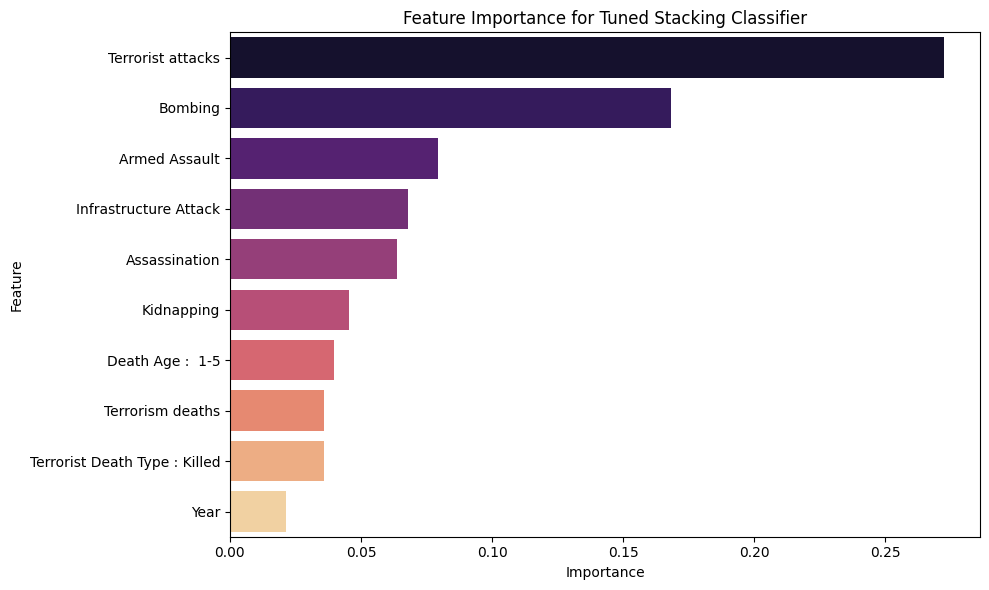

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('terrorist-attacks.csv')

# Define attack method columns
attack_method_columns = [
    'Attack method: Hijacking', 'Attack method: Hostage Taking (Barricade Incident)',
    'Attack method: Unarmed Assault', 'Attack method: Facility/Infrastructure Attack',
    'Attack method: Hostage Taking (Kidnapping)', 'Attack method: Assassination',
    'Attack method: Armed Assault', 'Attack method: Bombing/Explosion'
]

# Create Dominant Attack Method and shorten names
short_name_map = {
    'Attack method: Bombing/Explosion': 'Bombing',
    'Attack method: Armed Assault': 'Armed Assault',
    'Attack method: Facility/Infrastructure Attack': 'Infrastructure Attack',
    'Attack method: Assassination': 'Assassination',
    'Attack method: Hostage Taking (Kidnapping)': 'Kidnapping',
    'Attack method: Hijacking': 'Hijacking',
    'Attack method: Hostage Taking (Barricade Incident)': 'Barricade Incident',
    'Attack method: Unarmed Assault': 'Unarmed Assault'
}

df['Dominant Attack Method'] = df[attack_method_columns].idxmax(axis=1).map(short_name_map)

# One-hot encode Entity
df = pd.get_dummies(df, columns=['Entity'], drop_first=True)

# Label encode target
label_encoder = LabelEncoder()
df['Dominant Attack Method'] = label_encoder.fit_transform(df['Dominant Attack Method'])

# Define features and target
X = df.drop(['Dominant Attack Method', 'Code'], axis=1)
y = df['Dominant Attack Method']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuned Stacking Classifier
best_stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)),
        ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
        ('et', ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=42))
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=1000),
    cv=5,
    n_jobs=-1
)
best_stack.fit(X_train, y_train)

#Feature Importance Functions
def plot_feature_importance(model, model_name, feature_names):
    try:
        # Get feature importances
        importances = model.feature_importances_
        # Create a DataFrame for feature importance
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # Shorten feature names
        feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(
            lambda x: short_name_map.get(x, x.replace('Entity_', ''))
        )

        # Sort by importance and select top_n
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)
        
        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        
        return feature_importance_df
    except AttributeError:
        print(f"Error: {model_name} does not have feature_importances_ attribute.")
        return None

# Function to compute and plot average feature importance
def ensemble_feature_importance(ensemble_model, model_name, feature_names, base_model_names, top_n=10):
    try:
        # Initialize an array to store summed importances
        avg_importances = np.zeros(len(feature_names))
        num_tree_models = 0
        
        # Sum feature importances from base models
        for name in base_model_names:
            model = ensemble_model.named_estimators_[name]
            if hasattr(model, 'feature_importances_'):
                avg_importances += model.feature_importances_
                num_tree_models += 1
        
        if num_tree_models == 0:
            print(f"Error: No base models in {model_name} have feature_importances_.")
            return None
        
        # Average the importances
        avg_importances /= num_tree_models
        
        # Create a DataFrame
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': avg_importances
        })
        
        # Sort by importance and select top_n
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)
        
        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        
        return feature_importance_df
    except Exception as e:
        print(f"Error processing {model_name}: {str(e)}")
        return None

#Compute and Visualize Feature Importance ---
feature_names = X_train.columns

# Create a mapping dictionary for feature name shortening
feature_name_mapping = {
    'Attack method: Hijacking': 'Hijacking',
    'Attack method: Hostage Taking (Barricade Incident)': 'Barricade Incident',
    'Attack method: Unarmed Assault': 'Unarmed Assault',
    'Attack method: Facility/Infrastructure Attack': 'Infrastructure Attack',
    'Attack method: Hostage Taking (Kidnapping)': 'Kidnapping',
    'Attack method: Assassination': 'Assassination',
    'Attack method: Armed Assault': 'Armed Assault',
    'Attack method: Bombing/Explosion': 'Bombing'
}

# Apply the mapping to clean feature names
clean_feature_names = []
for name in feature_names:
    
    short_name = feature_name_mapping.get(name, name.replace('Entity_', ''))
    clean_feature_names.append(short_name)

stack_base_model_names = ['rf', 'dt', 'et']
voting_base_model_names = ['rf', 'dt', 'et']

models = [
    (best_stack, 'Tuned Stacking Classifier', stack_base_model_names),
]

for model_info in models:
    try:
        if len(model_info) == 2:
            model, model_name = model_info
            plot_feature_importance(model, model_name, clean_feature_names)
        else:
            model, model_name, base_model_names = model_info
            ensemble_feature_importance(model, model_name, clean_feature_names, base_model_names)
    except Exception as e:
        print(f"Error processing {model_info[1]}: {str(e)}")